In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-seattle/train.csv
/kaggle/input/house-price-prediction-seattle/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/house-price-prediction-seattle/test.csv")
print(data.head(5))

   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    3.0  2850.0       sqft   4200.00           sqft     98119   
1     4    5.0  3040.0       sqft   5002.00           sqft     98106   
2     3    1.0  1290.0       sqft   6048.00           sqft     98125   
3     3    2.0  2360.0       sqft      0.28           acre     98188   
4     3    3.5  1942.0       sqft   1603.00           sqft     98107   

       price  
0  1175000.0  
1  1057500.0  
2   799000.0  
3   565000.0  
4  1187000.0  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB
None


<Axes: xlabel='price', ylabel='size'>

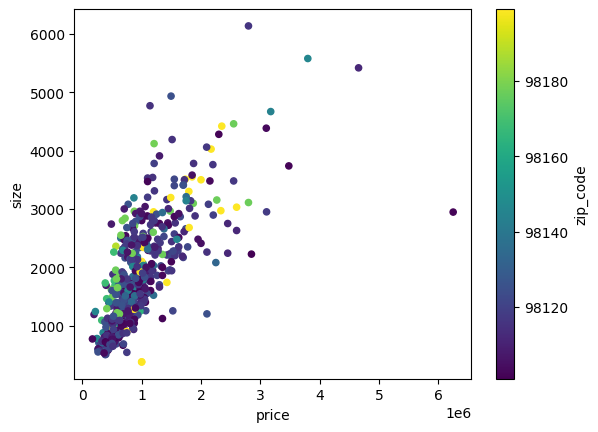

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot.scatter("price", "size", c="zip_code", colormap="viridis")

there is clearly a Heteroscedasticity problem is a common issue in regression models where the variance of the error terms is not constant across different levels of the independent
 variables. While it’s important to address, it seems like your task is to focus on something else.

Predicted Variable: This is the variable I trying to predict using your model. It’s often denoted as y pred  (the predicted values of y)
 

     zip_code         price
0       98119  98128.861930
1       98106  98123.180271
2       98125  98126.215144
3       98188  98129.362208
4       98107  98121.361123
..        ...           ...
500     98146  98141.230778
501     98126  98121.471514
502     98118  98131.281609
503     98115  98123.278447
504     98103  98122.702663

[505 rows x 2 columns]


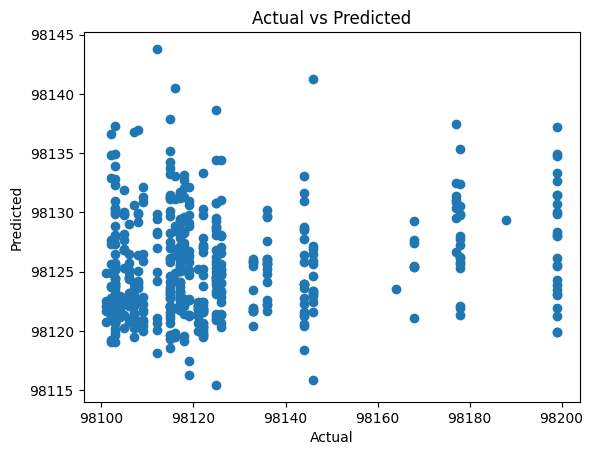

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your data
X = data[['size', 'beds', 'baths']]
y = data['zip_code']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Generate predictions
predictions = model.predict(X)

# Display the predictions
data['price'] = predictions
print(data[['zip_code', 'price']])

# Plot the actual vs predicted values
plt.scatter(data['zip_code'], data['price'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

 I can also visualize the predicted values against the actual values using a scatter plot. This can help me see how well the model is capturing the trend in the data.
  Plot the actual values on the x-axis and the predicted values on the y-axis. If the model is performing well, the points should cluster around a 45-degree line (where actual = predicted).
Another useful visualization is a residual plot, where I plot the residuals (actual - predicted) against the predicted values. 
This can help me see if there are any patterns in the residuals, which might indicate issues like heteroscedasticity.



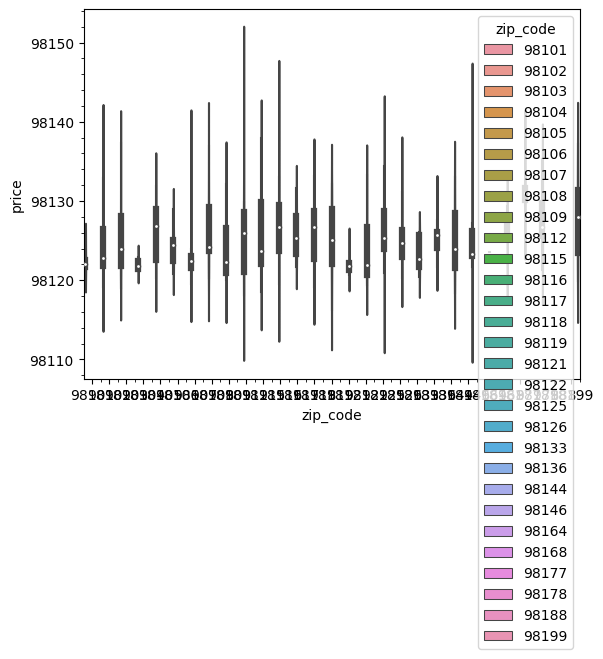

In [6]:
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

ax1 = sns.violinplot(x="zip_code", y="price", data=data, hue="zip_code")
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))


The price distribution seems roughly the same, with more high rents in the zip_code ç_112

if we consider that we have representative samples. I have to believe in any case with the size to have a clearer vision

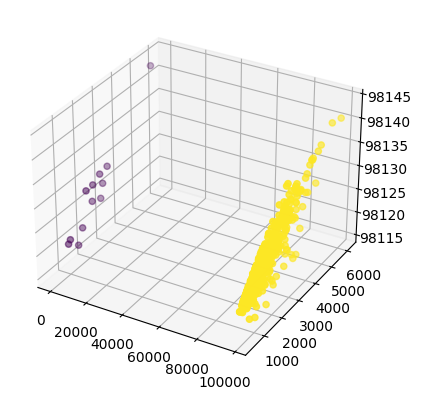

In [8]:
from mpl_toolkits.mplot3d import Axes3D
#create a figure
fig = plt.figure()
#add a 3d subplot
ax = fig.add_subplot(111, projection='3d')
#to facilitate visualization, we will change the value of zip_code 98112
tmp_zip = data['zip_code'][:]
tmp_zip[tmp_zip==98112]=5
# Create a 3D scatter plot
sc = ax.scatter(tmp_zip, data['size'], data['price'], c=tmp_zip, cmap='viridis')
plt.show()

We will perform a regression for each zip_code, to have more details. first separation of training dataset / test dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
xtrain, xtest, ytrain, ytest = train_test_split(data[['size', 'zip_code']], data['price'], test_size=0.3)

then create the baseline, and calculate the R2 (quadratic sum of residuals), as the evaluation value of our regression

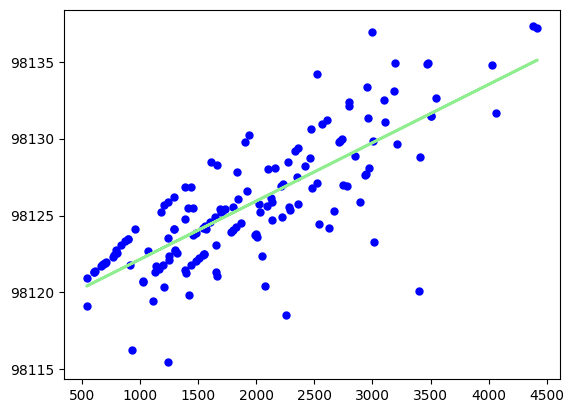

In [11]:
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[['size']], ytrain)
baseline_pred = lr_baseline.predict(xtest[['size']])
plt.plot(xtest[['size']], ytest,'bo',markersize=5)
plt.plot(xtest[['size']],baseline_pred, color='lightgreen', linewidth=2)

we rewrite the R2 score calculation

In [22]:
print(type(ytest))


<class 'pandas.core.series.Series'>


In [24]:
print(baseline_pred.shape, ytest.shape)

(152,) (152,)


In [25]:
def sumsquare(x, y):
    return sum((x - y) ** 2)

def r2_score(pred, target):
    return 1 - sumsquare(pred, target) / sumsquare(target, np.mean(target))

score_b1 = r2_score(baseline_pred, ytest)
print(score_b1)


0.6274284704629287


In [50]:
lrs=[]
for i in np.unique(xtrain['zip_code']):
    #we generate a dataset by zip_code
    train_zip = xtrain['zip_code']==i
    test_zip=xtest['zip_code']==i
    xtrain_zip = xtrain[train_zip]
    ytest_zip = ytest[test_zip]
    ytrain_zip = ytrain[train_zip]
    lr = LinearRegression()
    lr.fit(xtrain_zip['size'], ytrain_zip)
    lre.append(lr)
    #we make the final prediction on the test dataset with our new model, which combines the different models by size
    final_pred = []
for idx, val in xtest.iterrows():
     final_pred.append(lrs[int(val['zip_code']-1)].predict([[val['size']]])[0][0])
     r2score(final_pred, ytest['price'])
                    #Display final prediction
     plt.plot(xtest[['size']], ytest, 'bo', markersize=5)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#00FFFF", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#00FFFF", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#00FFFF", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#0000FF", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#00FF00", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#FF0000", linewidth=2)
     plt.plot(xtest[['size']], lrs[0].predict(xtest[['size']]), color="#FFFF00", linewidth=2)
                                                                   
                                                                   
                    
                    

                                                           
                                                                

ValueError: Expected 2D array, got 1D array instead:
array=[2241. 2190. 1430. 5420. 2610. 1892.  933.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.